# 🏀 NBA Team Points Prediction Model
🔬 **Data Exploring (Basic features + Points distribution)**
---    
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline
%load_ext autoreload
%autoreload 2
from data import ApiFetcher
from utils import distribution_calculating, check_distribution

api = ApiFetcher(2015, 2025)
df = api.get_dataframe('leaguegamelog')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✨ Introduction

📊 **Dataset Overview**  

In [30]:
print(f"Number of matches: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("Features in the dataset: ")
columns = df.columns.tolist()
for i in range(0, len(columns), 4):
    row_cols = columns[i:i+4]
    print("  " + " | ".join(f"{col:<15}" for col in row_cols))

Number of matches: 11974
Number of features: 27
Features in the dataset: 
  home_fga        | away_fga        | home_fg_pct     | away_fg_pct    
  home_fg3a       | away_fg3a       | home_fg3_pct    | away_fg3_pct   
  home_oreb       | away_oreb       | home_dreb       | away_dreb      
  home_ast        | away_ast        | home_stl        | away_stl       
  home_blk        | away_blk        | home_tov        | away_tov       
  home_pf         | away_pf         | home_pts        | away_pts       
  home_team_id    | away_team_id    | date           


🏀 **Key Features Analyzed:**

📅 **Game Context:**
- **date** - Date of the game

🎯 **Team Identification:**
- **_team_id** - Unique identifier for each team (assigned alphabetically)

🏹 **Shooting Metrics:**
- **_fga** - Field Goal Attempts (total shots taken)
- **_fg_pct** - Field Goal Percentage (shooting accuracy)
- **_fg3a** - Three-Point Attempts (beyond the arc shots)
- **_fg3_pct** - Three-Point Percentage (3-point accuracy)

🏀 **Rebounding:**
- **_oreb** - Offensive Rebounds (second-chance opportunities)
- **_dreb** - Defensive Rebounds (stopping opponent possessions)

⚡ **Playmaking & Defense:**
- **_ast** - Assists (passes leading to scores)
- **_stl** - Steals (forced turnovers)
- **_blk** - Blocks (shot rejections)

❌ **Mistakes & Fouls:**
- **_tov** - Turnovers (lost possessions)
- **_pf** - Personal Fouls (rule violations)

🎯 **Scoring:**
- **_pts** - Points Scored (final team output)

> 📝 **Note:** Each feature (except date) appears as **home_** and **away_** columns, representing both teams in each matchup.

## 📈🔗 Correlation and Covariation exploration 

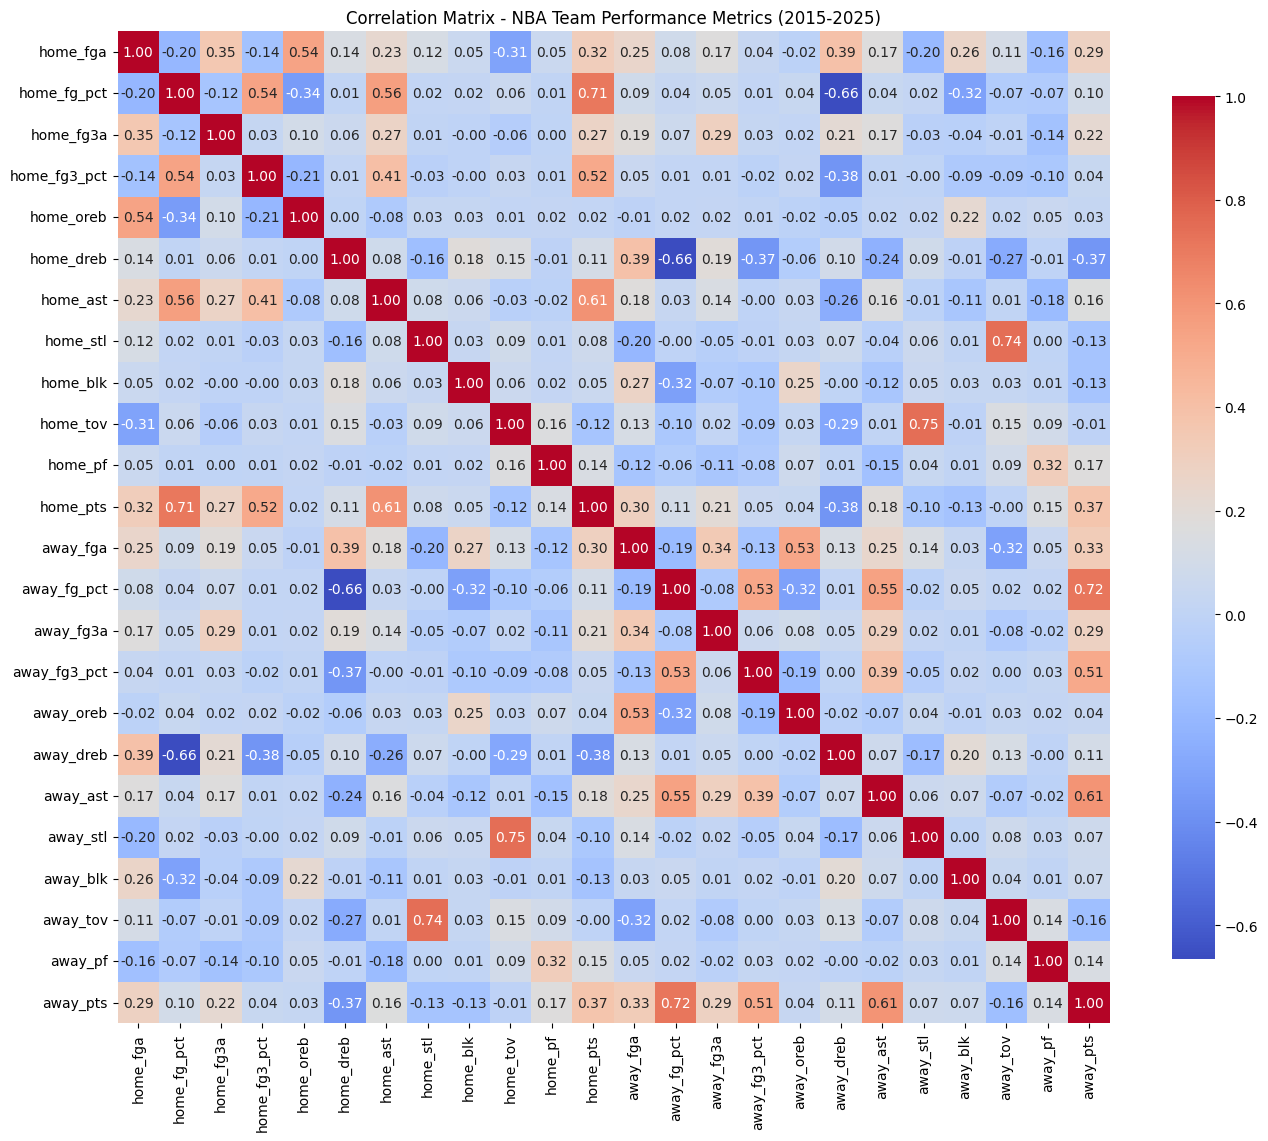

In [ ]:
numeric_cols_names = ['fga', 'fg_pct', 'fg3a', 'fg3_pct', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
numeric_cols = ['home_' + c for c in numeric_cols_names] + ['away_' + c for c in numeric_cols_names]
df0 = df[numeric_cols]

plt.figure(figsize=(16, 16))
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Correlation Matrix - NBA Team Performance Metrics (2015-2025)")
plt.show();

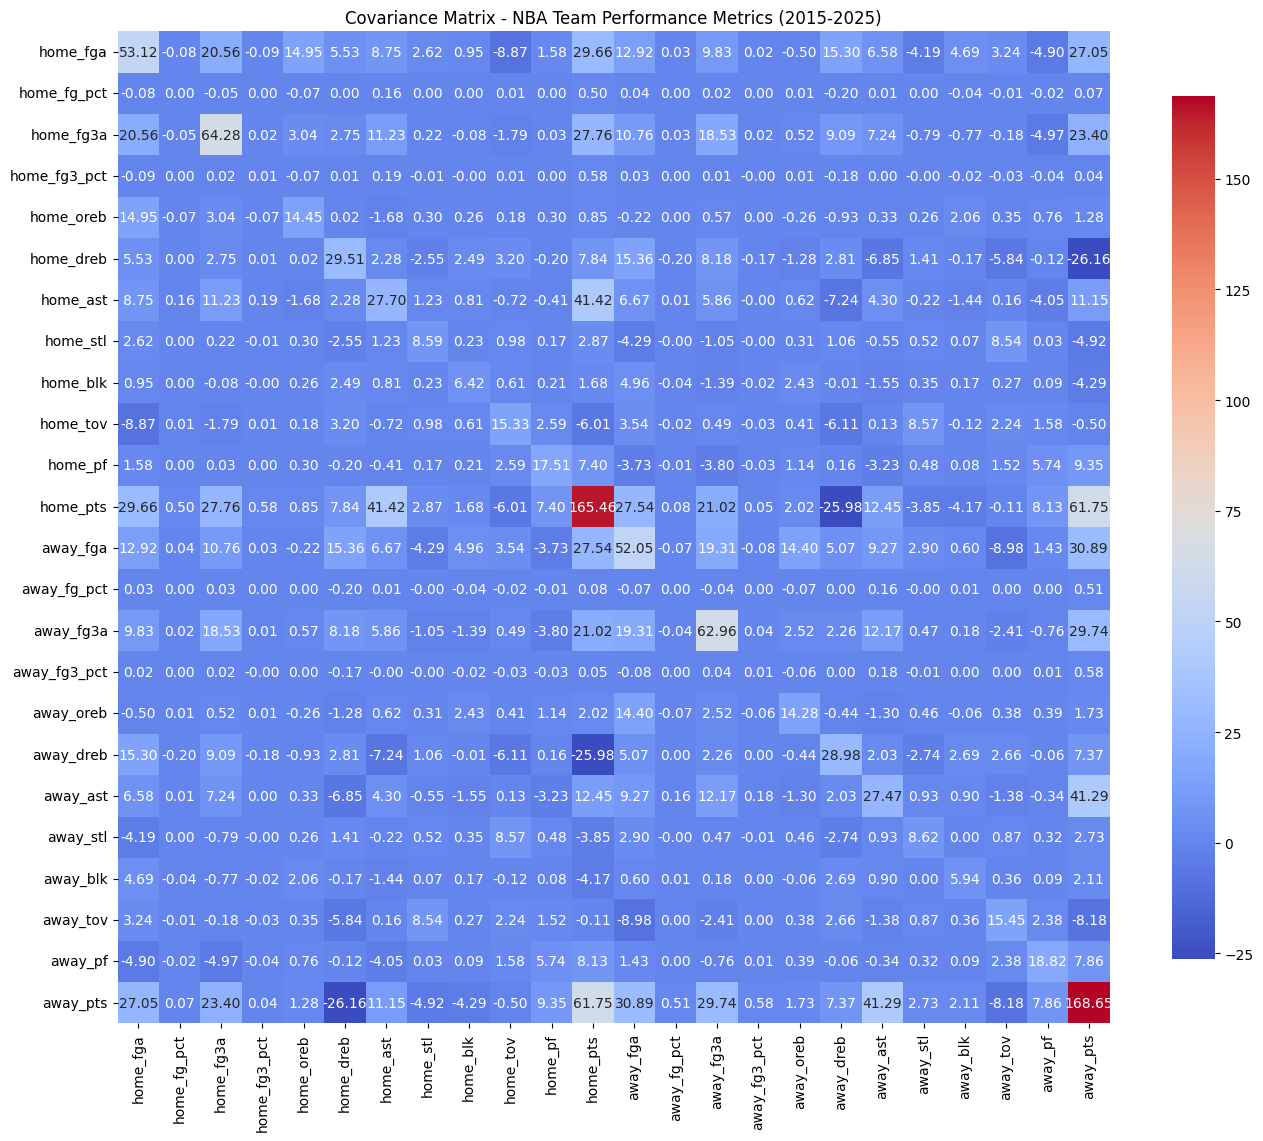

In [34]:
covariance_matrix = df0.cov()
plt.figure(figsize=(16, 16))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Covariance Matrix - NBA Team Performance Metrics (2015-2025)")
plt.show();

## 📶 Team points distribution

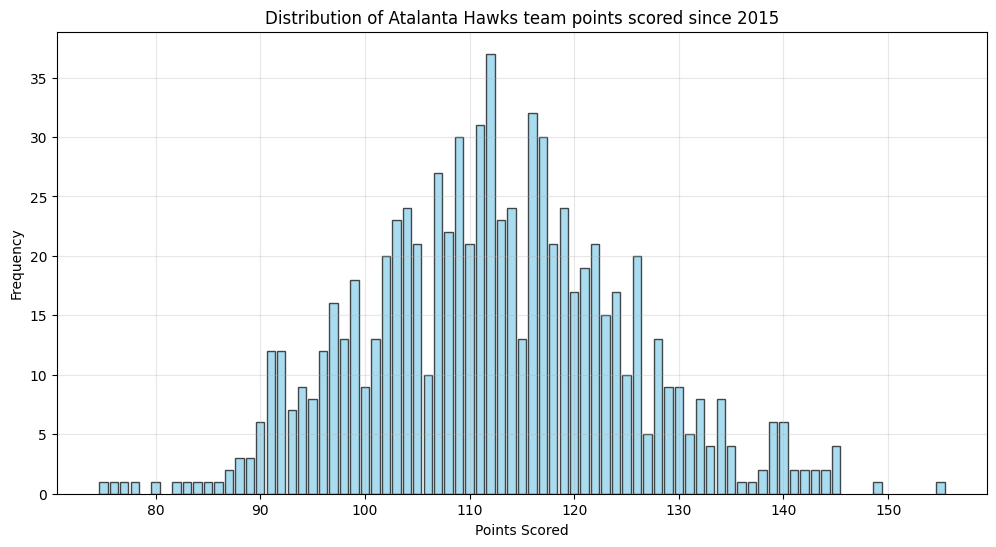

In [35]:
classical_distribution, home_distribution, away_distribution = distribution_calculating(df, 1)

points = list(classical_distribution.keys())
counts = list(classical_distribution.values())

plt.figure(figsize=(12, 6))
plt.bar(points, counts, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Atalanta Hawks team points scored since 2015')
plt.grid(True, alpha=0.3)
plt.show()

In [36]:
true_count, false_count = check_distribution(df)
print(f"Normality test results - {true_count/(false_count + true_count)*100:.1f}% distributions are normal")

Normality test results - 100.0% distributions are normal


All of the team points distribution since 2015 pass at least one of the normality tests (Shapiro-Wilk, D'Agostino's K-squared, Kolmogorov-Smirnov), so we can assume that the distribution is normal.

---

🎯 **Ready for modeling:** Normal distributions ✅ • Clear correlations ✅ • Clean data ✅

**→ Next:** Advanced features analysis